In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
#Class: Has or Hasn't Diabetes - 1 means has
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
#Step 1: Normalize the columns
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,30,0,A
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,26,1,C
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,29,0,A
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,1,D
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,54,1,A


In [8]:
print("2")

2


In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
glucose_concentration = tf.feature_column.numeric_column('Glucose_concentration')
blood_pressure = tf.feature_column.numeric_column('Blood_pressure')
stronk = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
BMI = tf.feature_column.numeric_column('BMI')
Pedigree = tf.feature_column.numeric_column('Pedigree')
Age = tf.feature_column.numeric_column("Age")


In [11]:
group_assigned = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [12]:
#Hash Bucket Size is the maximum number of groups believed to be in that column
group_assigned = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

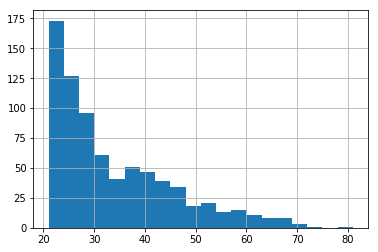

In [13]:
#Convert a continuous column to a categorical one
diabetes['Age'].hist(bins = 20)

In [14]:
age_bucket = tf.feature_column.bucketized_column(Age, [20, 30, 40, 50, 60, 70, 80])

In [15]:
feature_cols = [num_preg, glucose_concentration, blood_pressure, stronk, insulin, BMI, Pedigree, Age, group_assigned]

In [16]:
#Train test split
x_data = diabetes.drop('Class', axis=1)

In [17]:
x_data

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,30,A
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,26,C
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,29,A
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,D
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,54,A


In [18]:
labels = diabetes['Class']
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3)

In [19]:
input_fn = tf.estimator.inputs.pandas_input_fn(x = x_train, y = y_train, batch_size = 10, num_epochs=1000, shuffle = True)

In [20]:
#create a model
mod = tf.estimator.LinearClassifier(feature_columns=feature_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmpdycbp7bj', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [21]:
#now train the model
mod.train(input_fn=input_fn, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmpdycbp7bj/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 80.5663
INFO:tensorflow:loss = 7.08311, step = 101 (1.256 sec)
INFO:tensorflow:global_step/sec: 115.24
INFO:tensorflow:loss = 6.17391, step = 201 (0.859 sec)
INFO:tensorflow:global_step/sec: 115.047
INFO:tensorflow:loss = 6.21073, step = 301 (0.871 sec)
INFO:tensorflow:global_step/sec: 89.7395
INFO:tensorflow:loss = 7.2134, step = 401 (1.117 sec)
INFO:tensorflow:global_step/sec: 65.1837
INFO:tensorflow:loss = 5.54863, step = 501 (1.535 sec)
INFO:tensorflow:global_step/sec: 75.2187
INFO:tensorflow:loss = 4.99737, step = 601 (1.327 sec)
INFO:tensorflow:global_step/sec: 78.9803
INFO:tensorflow:loss = 5.61299, step = 701 (1.267 sec)
INFO:tensorflow:global_step/sec: 130.914
INFO:tensorflow:loss = 5.67238, step = 801 (0.764 sec)
INFO:tensorflow:global_step/se

In [22]:
evaluate_func = tf.estimator.inputs.pandas_input_fn(x = x_test, y= y_test, num_epochs=1, batch_size=10, shuffle = False)

In [23]:
res = mod.evaluate(evaluate_func)

INFO:tensorflow:Starting evaluation at 2019-02-10-06:36:59
INFO:tensorflow:Restoring parameters from /var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmpdycbp7bj/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-02-10-06:37:00
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.688312, accuracy_baseline = 0.627706, auc = 0.730353, auc_precision_recall = 0.608513, average_loss = 0.590727, global_step = 1000, label/mean = 0.372294, loss = 5.68575, prediction/mean = 0.34969


In [24]:
res

{'accuracy': 0.6883117,
 'accuracy_baseline': 0.62770563,
 'auc': 0.73035288,
 'auc_precision_recall': 0.60851252,
 'average_loss': 0.59072715,
 'label/mean': 0.37229437,
 'loss': 5.6857491,
 'prediction/mean': 0.34968999,
 'global_step': 1000}

In [25]:
#Get predictions using the evaluator we just made

In [26]:
predictor_A = tf.estimator.inputs.pandas_input_fn(x = x_test, batch_size= 10, num_epochs=1, shuffle=False
                                                 )

In [27]:
predictions_A = mod.predict(predictor_A)

In [28]:
predictions_A_list = list(predictions_A)

INFO:tensorflow:Restoring parameters from /var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmpdycbp7bj/model.ckpt-1000


In [29]:
predictions_A_list
#List of classes that are predicted, along with probablilities for each class.

[{'logits': array([-0.66426051], dtype=float32),
  'logistic': array([ 0.33978319], dtype=float32),
  'probabilities': array([ 0.66021681,  0.33978322], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.6352818], dtype=float32),
  'logistic': array([ 0.34631386], dtype=float32),
  'probabilities': array([ 0.65368617,  0.34631389], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.66459298], dtype=float32),
  'logistic': array([ 0.3397086], dtype=float32),
  'probabilities': array([ 0.66029137,  0.33970863], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.30495453], dtype=float32),
  'logistic': array([ 0.42434675], dtype=float32),
  'probabilities': array([ 0.57565325,  0.42434675], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([ 0.1183157], dtype=float32)

In [30]:
#Dense Neural Network

In [31]:
#Hidden units is the number of neurons per layer.
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10 , 10 , 10], feature_columns= feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmpbtqt2gik', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [32]:
#Note: Feature Columns muse be passed through embedded columns before being used in a DNN
embedded_group_col = tf.feature_column.embedding_column(group_assigned, dimension=4)

In [33]:
feature_cols = [num_preg, glucose_concentration, blood_pressure, stronk, insulin, BMI, Pedigree, Age, embedded_group_col]

In [34]:
eval_in_func = tf.estimator.inputs.pandas_input_fn(x_train, y_train, batch_size=10, num_epochs=1000, shuffle=False)

In [35]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feature_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmp5bokynib', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [36]:
dnn_model.train(input_fn=eval_in_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmp5bokynib/model.ckpt.
INFO:tensorflow:loss = 6.25413, step = 1
INFO:tensorflow:global_step/sec: 169.712
INFO:tensorflow:loss = 6.1647, step = 101 (0.594 sec)
INFO:tensorflow:global_step/sec: 196.958
INFO:tensorflow:loss = 8.28402, step = 201 (0.507 sec)
INFO:tensorflow:global_step/sec: 166.461
INFO:tensorflow:loss = 6.9105, step = 301 (0.601 sec)
INFO:tensorflow:global_step/sec: 164.798
INFO:tensorflow:loss = 5.85519, step = 401 (0.605 sec)
INFO:tensorflow:global_step/sec: 162.012
INFO:tensorflow:loss = 6.16622, step = 501 (0.618 sec)
INFO:tensorflow:global_step/sec: 142.882
INFO:tensorflow:loss = 4.97482, step = 601 (0.704 sec)
INFO:tensorflow:global_step/sec: 157.942
INFO:tensorflow:loss = 6.0507, step = 701 (0.628 sec)
INFO:tensorflow:global_step/sec: 204.288
INFO:tensorflow:loss = 4.81005, step = 801 (0.488 sec)
INFO:tensorflow:global_step/sec

In [37]:
try_eval = tf.estimator.inputs.pandas_input_fn(x_test, y_test, batch_size=10, num_epochs=1, shuffle=False)

In [38]:
dnn_model.evaluate(try_eval)

INFO:tensorflow:Starting evaluation at 2019-02-10-07:04:38
INFO:tensorflow:Restoring parameters from /var/folders/mc/09nmrqks7w96sf7znr92h_4c0000gp/T/tmp5bokynib/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-02-10-07:04:39
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.688312, accuracy_baseline = 0.627706, auc = 0.744106, auc_precision_recall = 0.571546, average_loss = 0.575105, global_step = 1000, label/mean = 0.372294, loss = 5.53539, prediction/mean = 0.339822


{'accuracy': 0.6883117,
 'accuracy_baseline': 0.62770563,
 'auc': 0.74410594,
 'auc_precision_recall': 0.57154584,
 'average_loss': 0.57510501,
 'label/mean': 0.37229437,
 'loss': 5.5353856,
 'prediction/mean': 0.3398222,
 'global_step': 1000}